# Графики времени выполнения, ускорения и эффективности.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import os
results = os.listdir('./results')
size = ['64x64', '128x128', '256x256', '512x512', '1024x1024']
time = {}
num_threads = [1,2,4,8,16,32,64]
algs = ['alg1', 'alg2', 'alg3']

for size_ in size:
    time[size_] = {}
    for num_thread in num_threads:
        time[size_][num_thread] = {}
        for alg in algs:
            time[size_][num_thread][alg] = []

            with open(f'./results/res{size_}_{alg}_th{num_thread}.txt') as f:
                for line in f:
                    time[size_][num_thread][alg].append(float(line))

In [14]:
import numpy as np
mean_time = {}
for size_ in size:
    mean_time[size_] = {}
    for num_thread in num_threads:
        mean_time[size_][num_thread] = {}
        for alg in algs:
            mean_time[size_][num_thread][alg] = np.mean(time[size_][num_thread][alg])

In [15]:
mean_time

{'64x64': {1: {'alg1': 0.0031628999999999997,
   'alg2': 0.0030943,
   'alg3': 0.0036128},
  2: {'alg1': 0.0019611, 'alg2': 0.001998, 'alg3': 0.002005},
  4: {'alg1': 0.0026222999999999997,
   'alg2': 0.0020393,
   'alg3': 0.0016177999999999998},
  8: {'alg1': 0.0018464999999999998, 'alg2': 0.0023098, 'alg3': 0.0021227},
  16: {'alg1': 0.0028038, 'alg2': 0.0033899, 'alg3': 0.0025815000000000005},
  32: {'alg1': 0.0061959, 'alg2': 0.0041319, 'alg3': 0.0036105},
  64: {'alg1': 0.007122500000000001,
   'alg2': 0.011422,
   'alg3': 0.007043100000000001}},
 '128x128': {1: {'alg1': 0.024339899999999998,
   'alg2': 0.024928900000000004,
   'alg3': 0.027565600000000003},
  2: {'alg1': 0.0135825, 'alg2': 0.012568400000000002, 'alg3': 0.0137927},
  4: {'alg1': 0.0095013, 'alg2': 0.0123548, 'alg3': 0.0096089},
  8: {'alg1': 0.0079624, 'alg2': 0.0102743, 'alg3': 0.0085399},
  16: {'alg1': 0.0094401, 'alg2': 0.010069, 'alg3': 0.009660600000000002},
  32: {'alg1': 0.0102921,
   'alg2': 0.01380479999

In [17]:
means_by_size_alg1 = []
for size_ in size:
    for num_thread in num_threads:
        means_by_size_alg1.append(mean_time[size_][num_thread]['alg1'])

In [ ]:
means_by_size_th_alg1 = []
for i in range(len(num_threads)):
    means_by_size_th_alg1.append(means_by_size_alg1[i::7])
means_by_size_th_alg1

In [70]:
means_by_size_alg2 = []
for size_ in size:
    for num_thread in num_threads:
        means_by_size_alg2.append(mean_time[size_][num_thread]['alg2'])

means_by_size_th_alg2 = []
for i in range(len(num_threads)):
    means_by_size_th_alg2.append(means_by_size_alg2[i::7])

means_by_size_alg3 = []
for size_ in size:
    for num_thread in num_threads:
        means_by_size_alg3.append(mean_time[size_][num_thread]['alg3'])

means_by_size_th_alg3 = []
for i in range(len(num_threads)):
    means_by_size_th_alg3.append(means_by_size_alg3[i::7])

In [94]:
mean_by_size_th4 = []
for size_ in size:
    for alg in algs:
        mean_by_size_th4.append(mean_time[size_][4][alg])
mean_by_size_th4

mean_by_size_th4_ =[]
for i in range(len(algs)):
    mean_by_size_th4_.append(mean_by_size_th4[i::3])

In [106]:
import seaborn as sns
from seaborn import set_style
set_style('darkgrid')

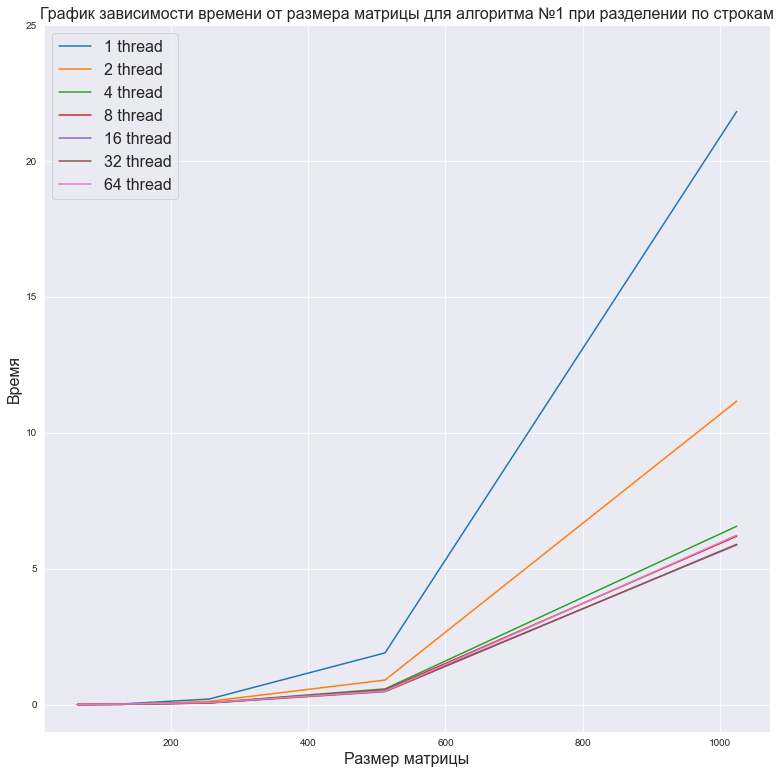

In [107]:
size_for_graph = [64, 128, 256, 512, 1024]
plt.figure(figsize=(13, 13))
for i in range(len(num_threads)):
    plt.plot(size_for_graph, means_by_size_th_alg1[i])

plt.xlabel('Размер матрицы', fontsize=16)
plt.ylabel('Время', fontsize=16)
plt.ylim([-1, 25])
plt.title("График зависимости времени от размера матрицы для алгоритма №1 при разделении по строкам", size=16)
plt.legend(['1 thread', '2 thread', '4 thread', '8 thread', '16 thread', '32 thread', '64 thread'], fontsize=16);

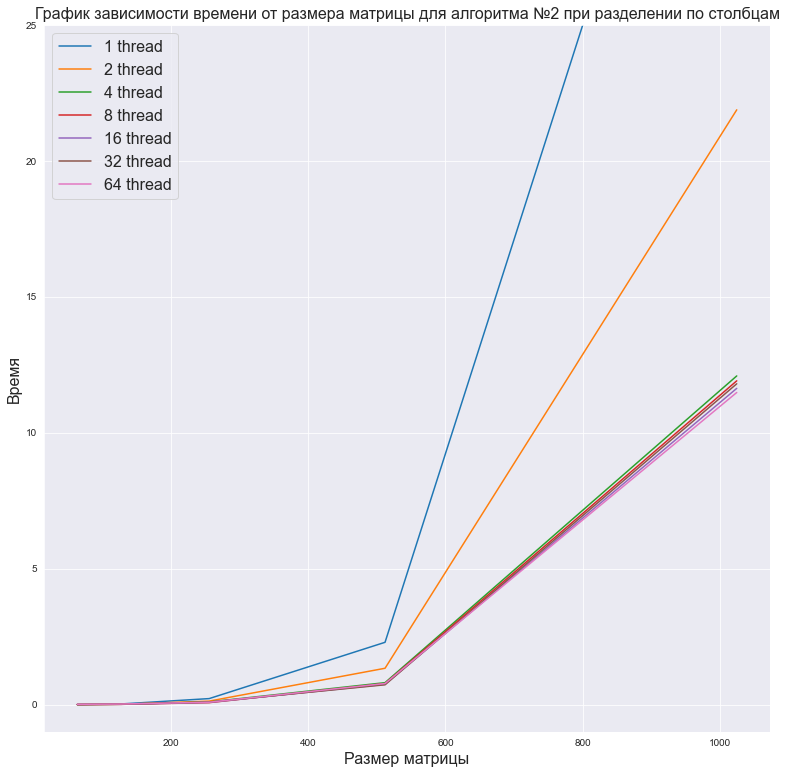

In [103]:
size_for_graph = [64, 128, 256, 512, 1024]
plt.figure(figsize=(13, 13))
for i in range(len(num_threads)):
    plt.plot(size_for_graph, means_by_size_th_alg2[i])

plt.xlabel('Размер матрицы', size = 16)
plt.ylabel('Время', size = 16)
plt.ylim([-1, 25])
plt.title("График зависимости времени от размера матрицы для алгоритма №2 при разделении по столбцам",size=16)
plt.legend(['1 thread', '2 thread', '4 thread', '8 thread', '16 thread', '32 thread', '64 thread'], fontsize=16);

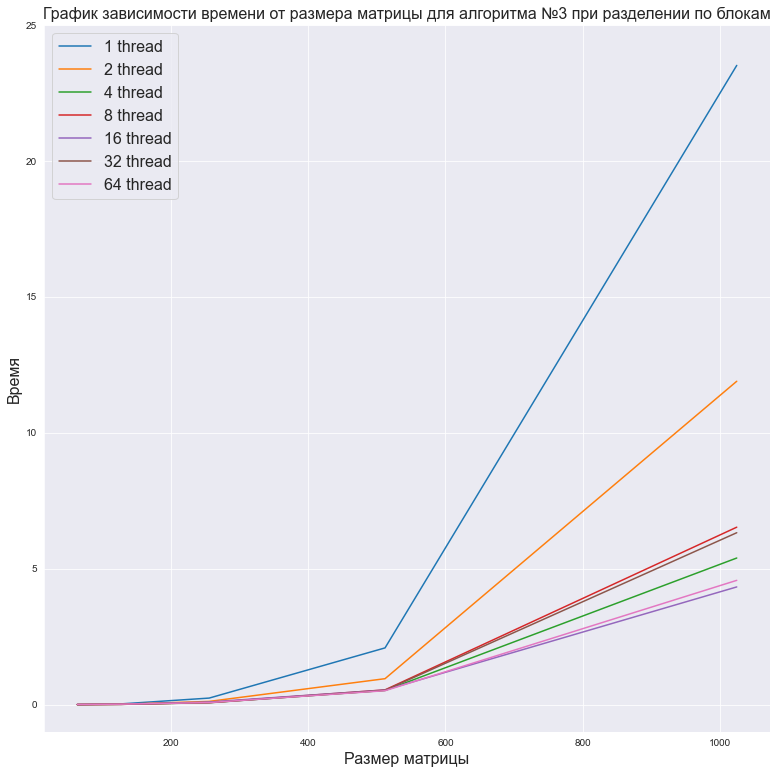

In [104]:
size_for_graph = [64, 128, 256, 512, 1024]
plt.figure(figsize=(13, 13))
for i in range(len(num_threads)):
    plt.plot(size_for_graph, means_by_size_th_alg3[i])

plt.xlabel('Размер матрицы', fontsize=16)
plt.ylabel('Время', fontsize=16)
plt.ylim([-1, 25])
plt.title("График зависимости времени от размера матрицы для алгоритма №3 при разделении по блокам", size=16)
plt.legend(['1 thread', '2 thread', '4 thread', '8 thread', '16 thread', '32 thread', '64 thread'],fontsize=16)

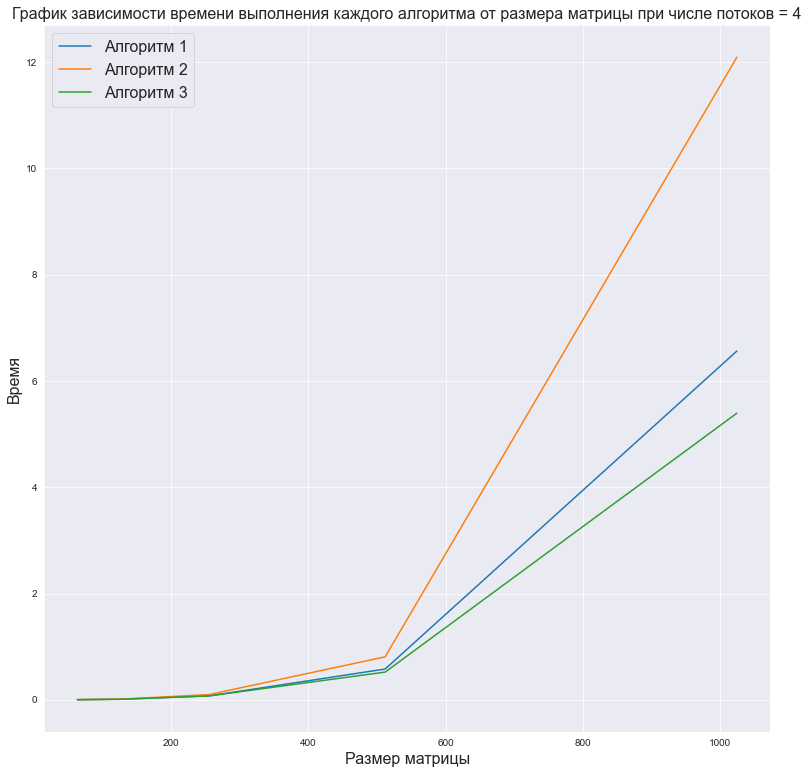

In [105]:
size_for_graph = [64, 128, 256, 512, 1024]
plt.figure(figsize=(13, 13))
for i in range(len(algs)):
    plt.plot(size_for_graph, mean_by_size_th4_[i])

plt.xlabel('Размер матрицы', fontsize=16)
plt.ylabel('Время', fontsize=16)
# plt.ylim([-1, 25])
plt.title("График зависимости времени выполнения каждого алгоритма от размера матрицы при числе потоков = 4", size=16)
plt.legend(['Алгоритм 1', 'Алгоритм 2', 'Алгоритм 3'],fontsize=16)

# Ускорение

In [133]:
speed_up_alg1 = []
for i in range(len(num_threads)):
    speed_up_alg1.append([])
    for j in range(len(size)):
        speed_up_alg1[i].append(means_by_size_th_alg1[0][j]/means_by_size_th_alg1[i][j])
speed_up_alg1 = np.array(speed_up_alg1).transpose()

speed_up_alg2 = []
for i in range(len(num_threads)):
    speed_up_alg2.append([])
    for j in range(len(size)):
        speed_up_alg2[i].append(means_by_size_th_alg2[0][j]/means_by_size_th_alg2[i][j])
speed_up_alg2 = np.array(speed_up_alg2).transpose()

speed_up_alg3 = []
for i in range(len(num_threads)):
    speed_up_alg3.append([])
    for j in range(len(size)):
        speed_up_alg3[i].append(means_by_size_th_alg3[0][j]/means_by_size_th_alg3[i][j])
speed_up_alg3 = np.array(speed_up_alg3).transpose()

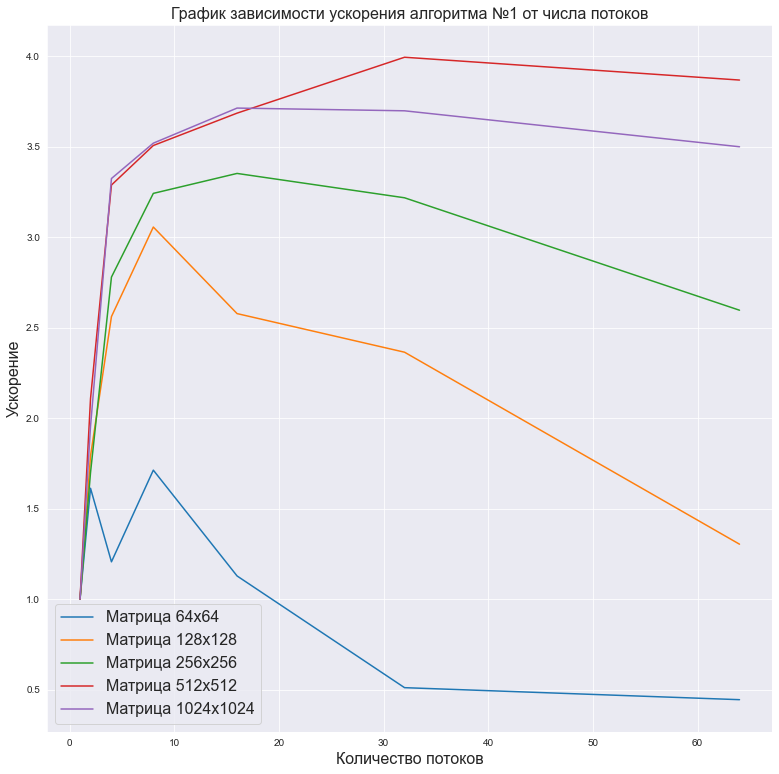

In [134]:
plt.figure(figsize=(13, 13))
for i in range(len(size)):
    plt.plot(num_threads, speed_up_alg1[i])

plt.xlabel('Количество потоков', fontsize=16)
plt.ylabel('Ускорение', fontsize=16)
# plt.ylim([-1, 25])
plt.title("График зависимости ускорения алгоритма №1 от числа потоков", size=16)
plt.legend(['Матрица 64x64', 'Матрица 128x128', 'Матрица 256x256', 'Матрица 512x512', 'Матрица 1024x1024'],fontsize=16)

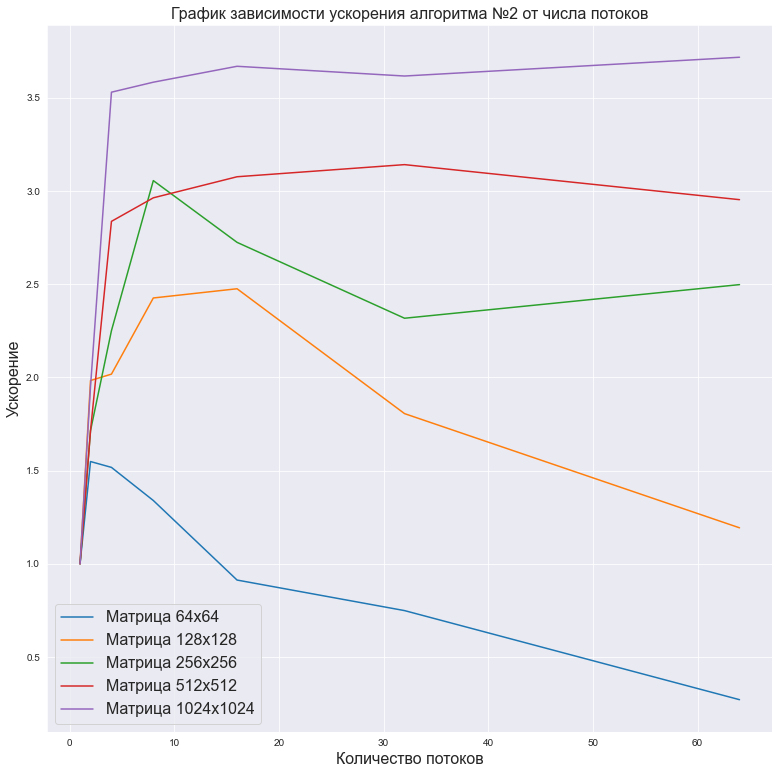

In [136]:
plt.figure(figsize=(13, 13))
for i in range(len(size)):
    plt.plot(num_threads, speed_up_alg2[i])

plt.xlabel('Количество потоков', fontsize=16)
plt.ylabel('Ускорение', fontsize=16)
# plt.ylim([-1, 25])
plt.title("График зависимости ускорения алгоритма №2 от числа потоков", size=16)
plt.legend(['Матрица 64x64', 'Матрица 128x128', 'Матрица 256x256', 'Матрица 512x512', 'Матрица 1024x1024'],fontsize=16)

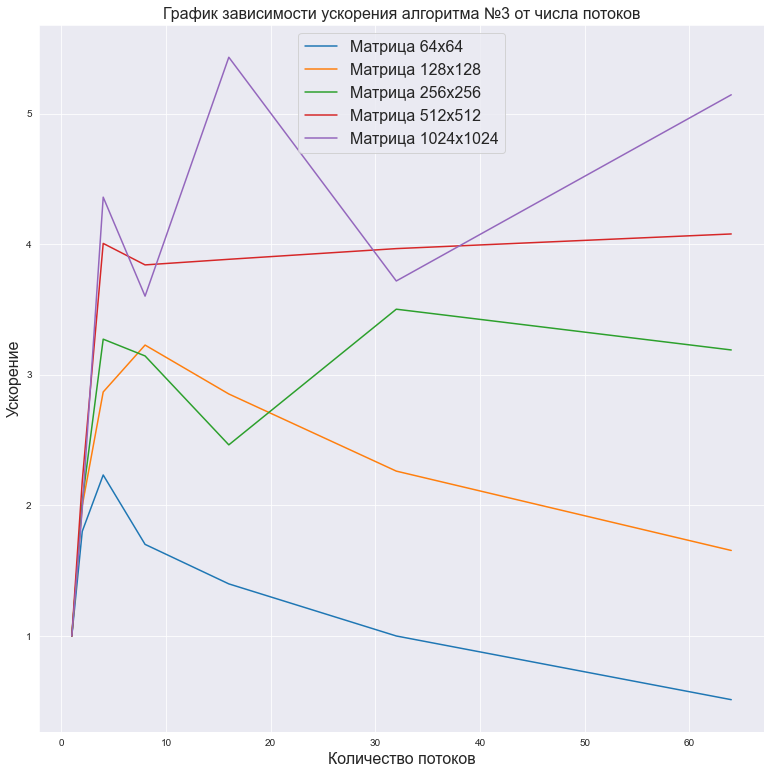

In [137]:
plt.figure(figsize=(13, 13))
for i in range(len(size)):
    plt.plot(num_threads, speed_up_alg3[i])

plt.xlabel('Количество потоков', fontsize=16)
plt.ylabel('Ускорение', fontsize=16)
# plt.ylim([-1, 25])
plt.title("График зависимости ускорения алгоритма №3 от числа потоков", size=16)
plt.legend(['Матрица 64x64', 'Матрица 128x128', 'Матрица 256x256', 'Матрица 512x512', 'Матрица 1024x1024'],fontsize=16)

# Эффективность

In [144]:
# ускорение/кол-во потоков
efficiency_alg1 = []
for i in range(len(num_threads)):
    efficiency_alg1.append([])
    for j in range(len(size)):
        efficiency_alg1[i].append(means_by_size_th_alg1[0][j]/means_by_size_th_alg1[i][j]/2**i)
efficiency_alg1 = np.array(efficiency_alg1).transpose()

efficiency_alg2 = []
for i in range(len(num_threads)):
    efficiency_alg2.append([])
    for j in range(len(size)):
        efficiency_alg2[i].append(means_by_size_th_alg2[0][j]/means_by_size_th_alg2[i][j]/2**i)
efficiency_alg2 = np.array(efficiency_alg2).transpose()

efficiency_alg3 = []
for i in range(len(num_threads)):
    efficiency_alg3.append([])
    for j in range(len(size)):
        efficiency_alg3[i].append(means_by_size_th_alg3[0][j]/means_by_size_th_alg3[i][j]/2**i)
efficiency_alg3 = np.array(efficiency_alg3).transpose()

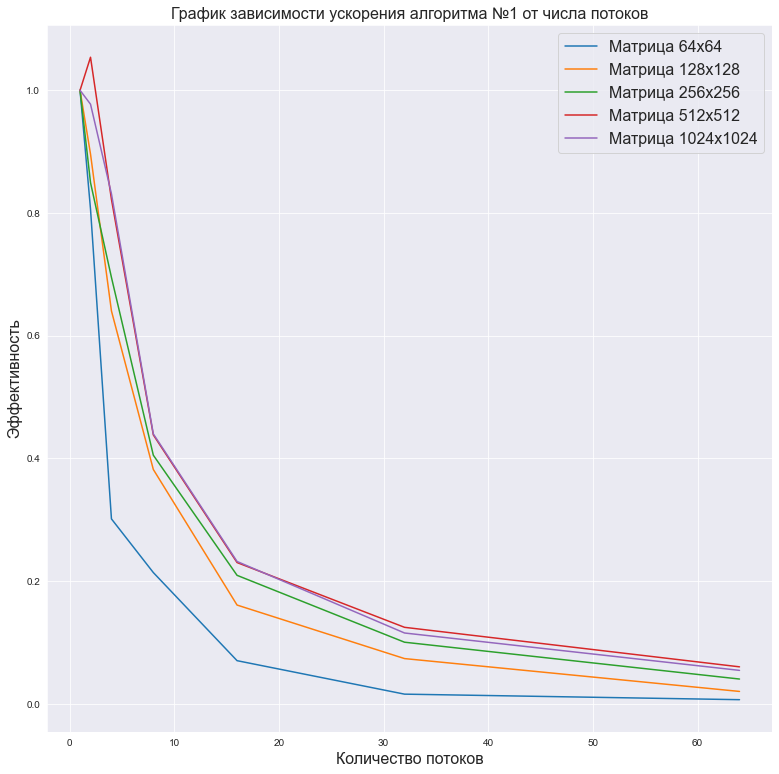

In [145]:
plt.figure(figsize=(13, 13))
for i in range(len(size)):
    plt.plot(num_threads, efficiency_alg1[i])

plt.xlabel('Количество потоков', fontsize=16)
plt.ylabel('Эффективность', fontsize=16)
# plt.ylim([-1, 25])
plt.title("График зависимости ускорения алгоритма №1 от числа потоков", size=16)
plt.legend(['Матрица 64x64', 'Матрица 128x128', 'Матрица 256x256', 'Матрица 512x512', 'Матрица 1024x1024'],fontsize=16)

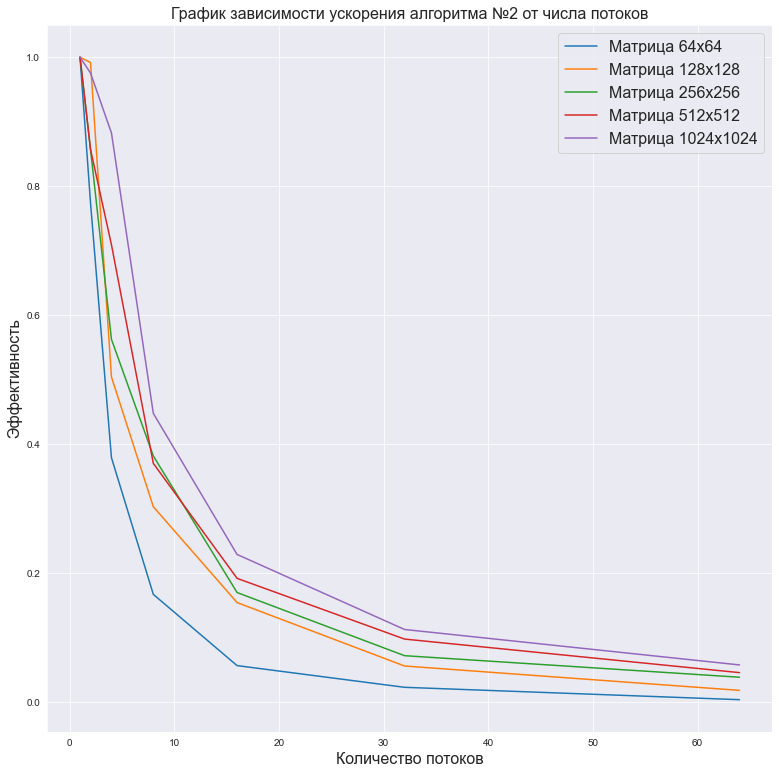

In [147]:
plt.figure(figsize=(13, 13))
for i in range(len(size)):
    plt.plot(num_threads, efficiency_alg2[i])

plt.xlabel('Количество потоков', fontsize=16)
plt.ylabel('Эффективность', fontsize=16)
# plt.ylim([-1, 25])
plt.title("График зависимости ускорения алгоритма №2 от числа потоков", size=16)
plt.legend(['Матрица 64x64', 'Матрица 128x128', 'Матрица 256x256', 'Матрица 512x512', 'Матрица 1024x1024'],fontsize=16)

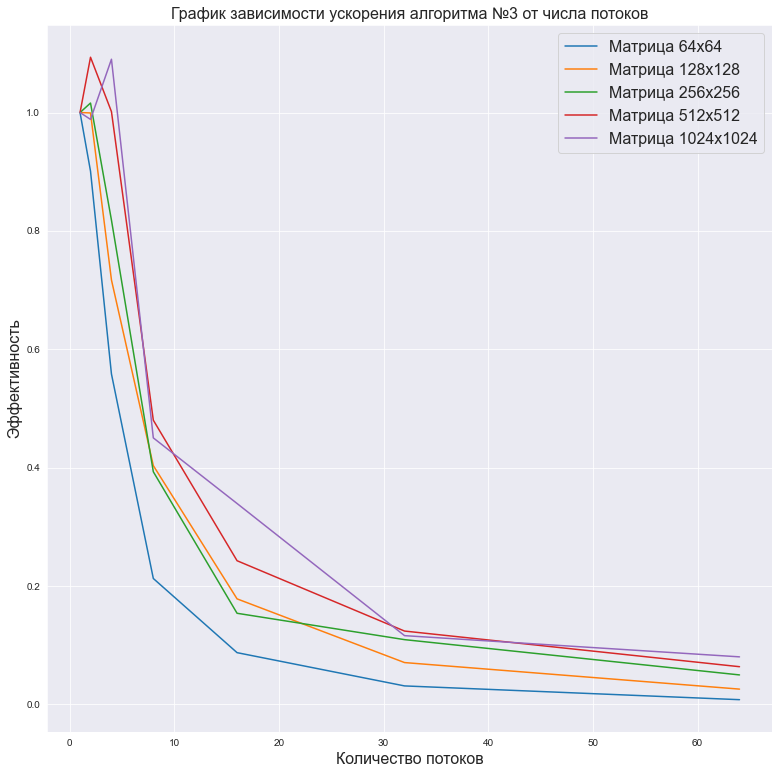

In [148]:
plt.figure(figsize=(13, 13))
for i in range(len(size)):
    plt.plot(num_threads, efficiency_alg3[i])

plt.xlabel('Количество потоков', fontsize=16)
plt.ylabel('Эффективность', fontsize=16)
# plt.ylim([-1, 25])
plt.title("График зависимости ускорения алгоритма №3 от числа потоков", size=16)
plt.legend(['Матрица 64x64', 'Матрица 128x128', 'Матрица 256x256', 'Матрица 512x512', 'Матрица 1024x1024'],fontsize=16)